In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import svm

In [2]:
covertype_path = 'covtype.data'

names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]

Wilderness_Area = []
for i in range(4):
    Wilderness_Area.append('Wilderness_Area_{}'.format(i+1))

Soil_Type = []
for i in range(40):
    Soil_Type.append('Soil_Type_{}'.format(i+1))

names.extend(Wilderness_Area + Soil_Type + ['Cover_Type'])
covertype_df = pd.read_csv(covertype_path, names=names)


In [3]:
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [55]:
X = covertype_df.drop('Cover_Type',axis=1)
y = covertype_df['Cover_Type']


#using stratified split
X_train75, X_test25, y_train75, y_test25 = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, stratify = y)

print(len(y_train75))
print(len(y_test25))

print('Training dataset Shape {}'.format(Counter(y_train75)))
print('Test dataset Shape {}'.format(Counter(y_test25)))



435759
145253
Training dataset Shape Counter({2: 212476, 1: 158880, 3: 26816, 7: 15382, 6: 13025, 5: 7120, 4: 2060})
Test dataset Shape Counter({2: 70825, 1: 52960, 3: 8938, 7: 5128, 6: 4342, 5: 2373, 4: 687})


In [5]:
from collections import Counter
print('Original dataset Shape {}'.format(Counter(y)))
print(len(y))

Original dataset Shape Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})
581012


In [6]:
#choose 50% from the training set

X_train75_50, X_discard, y_train75_50, y_discard = train_test_split(X_train75, y_train75, test_size = 0.5)

print(len(X_train75_50))

217879


In [7]:
#Make a small dataset from the above- 
#First step is RnadomUnderSampling- as dataset is skewed

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_50, y_rus_75_50, idx_rus_75_50 = rus.fit_sample(X_train75_50, y_train75_50)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_50)))
print(len(y_rus_75_50))

Resampled dataset Shape Counter({1: 1022, 2: 1022, 3: 1022, 4: 1022, 5: 1022, 6: 1022, 7: 1022})
7154


In [9]:

#choose 250 samples from 7154 samples
import random
print(len(X_rus_75_50[0]))
print(len(X_rus_75_50.T[0]))

data_50 = []
for i in range(0,54):
    data_50.append(X_rus_75_50.T[i])

    
#attaching labels    
data_50.append(y_rus_75_50.T)    

data_50  = np.array(data_50).T
print(len(data_50))

print(data_50.shape)


data_sample_50 = random.sample(list(data_50), 250)

data_sample_50 = np.array(data_sample_50)
print(data_sample_50.shape)


data_sample_50 = data_sample_50.T
X_50 = data_sample_50[0:54]
X_50 = X_50. T
print(X_50.shape)

Y_50 = data_sample_50[54]
Y_50 = Y_50.T
print(Y_50.shape)


print('Small dataset Shape from 50% of the 75%training set {}'.format(Counter(Y_50)))

54
7154
7154
(7154, 55)
(250, 55)
(250, 54)
(250,)
Small dataset Shape from 50% of the 75%training set Counter({6: 47, 2: 44, 4: 38, 5: 32, 3: 31, 1: 29, 7: 29})


In [10]:
#using default rbf
clf_rbf  = svm.SVC()
scores_rbf_2 = cross_val_score(clf_rbf, X_50, Y_50, cv = 2)
scores_rbf_2.mean()

0.18798412393572755

In [11]:
#using default rbf
scores_rbf_5 = cross_val_score(clf_rbf, X_50, Y_50, cv = 5)
scores_rbf_5.mean()

0.18806251617830197

In [12]:
clf_poly = svm.SVC(kernel = 'poly')
scores_poly_2 = cross_val_score(clf_poly, X_50, Y_50, cv = 2)
scores_poly_2.mean()

0.47592983803853783

In [13]:
scores_poly_5 = cross_val_score(clf_poly, X_50, Y_50, cv = 5)
scores_poly_5.mean()

0.50610231254740801

In [14]:
clf_linear = svm.SVC(kernel = 'linear')
scores_linear_2 = cross_val_score(clf_linear, X_50, Y_50, cv = 2)
scores_linear_2.mean()

0.48393188656296016

In [15]:
scores_linear_5 = cross_val_score(clf_linear, X_50, Y_50, cv = 5)
scores_linear_5.mean()

0.5401711416440117

In [16]:
clf_sigmoid = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_2 = cross_val_score(clf_sigmoid, X_50, Y_50, cv = 2)
scores_sigmoid_2.mean()

0.18798412393572755

In [17]:
scores_sigmoid_5 = cross_val_score(clf_sigmoid, X_50, Y_50, cv = 5)
scores_sigmoid_5.mean()

0.18806251617830197

In [18]:
#preparing a small test dataset from the 25% of the total dataset with stratified sampling

X_test25_small, X_discard, y_test25_small, y_discard = train_test_split(X_test25, y_test25, test_size=0.997, stratify = y_test25)

print(len(X_test25_small))

print('Small test dataset Shape {}'.format(Counter(y_test25_small)))

435
Small test dataset Shape Counter({2: 212, 1: 159, 3: 27, 7: 15, 6: 13, 5: 7, 4: 2})


In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"C": [1,2,3,4,5],
              "kernel":['poly','linear'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr'] }

# run grid search
grid_search = GridSearchCV(clf_linear, param_grid=param_grid)
start = time()
grid_search.fit(X_50, Y_50)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

In [19]:
#linear kernel gives the best scores

scores_linear_2_test = cross_val_score(clf_linear, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test.mean()

0.62087737843551793

In [20]:
scores_linear_5_test = cross_val_score(clf_linear, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test.mean()

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.66438494777756074

In [21]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear.fit(X_50, Y_50)
y_pred_50 = clf_linear.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_50)

0.45287356321839078

Confusion matrix, without normalization
[[69 47  0  0  3  1 39]
 [63 93  5  0 27  6 18]
 [ 0  0 12  5  1  9  0]
 [ 0  0  0  1  0  1  0]
 [ 1  3  1  0  2  0  0]
 [ 0  1  1  1  3  7  0]
 [ 1  1  0  0  0  0 13]]
Normalized confusion matrix
[[ 0.43  0.3   0.    0.    0.02  0.01  0.25]
 [ 0.3   0.44  0.02  0.    0.13  0.03  0.08]
 [ 0.    0.    0.44  0.19  0.04  0.33  0.  ]
 [ 0.    0.    0.    0.5   0.    0.5   0.  ]
 [ 0.14  0.43  0.14  0.    0.29  0.    0.  ]
 [ 0.    0.08  0.08  0.08  0.23  0.54  0.  ]
 [ 0.07  0.07  0.    0.    0.    0.    0.87]]


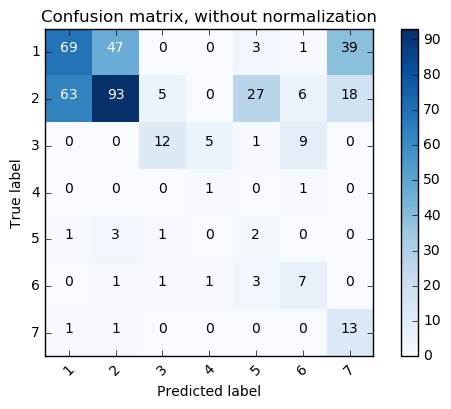

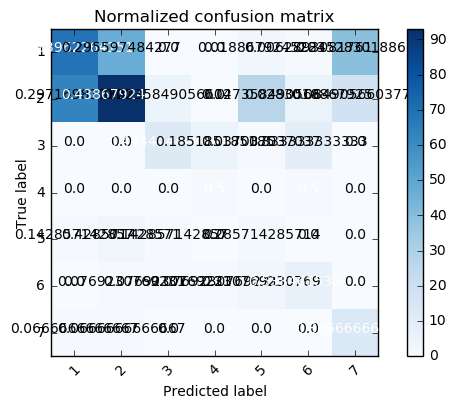

In [22]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
from sklearn.metrics import confusion_matrix
import itertools
names =   ['1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_50)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [23]:
#choose 75% from the total training set

X_train75_75, X_discard, y_train75_75, y_discard = train_test_split(X_train75, y_train75, test_size = 0.25)

print(len(X_train75_75))

326819


In [24]:
#Make a small dataset from the above- 
#First step is RnadomUnderSampling- as dataset is skewed

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_75, y_rus_75_75, idx_rus_75_75 = rus.fit_sample(X_train75_75, y_train75_75)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_75)))
print(len(y_rus_75_75))

Resampled dataset Shape Counter({1: 1556, 2: 1556, 3: 1556, 4: 1556, 5: 1556, 6: 1556, 7: 1556})
10892


In [26]:

#choose 375 samples from 10892 samples
import random
print(len(X_rus_75_75[0]))
print(len(X_rus_75_75.T[0]))

data_75 = []
for i in range(0,54):
    data_75.append(X_rus_75_75.T[i])

    
#attaching labels    
data_75.append(y_rus_75_75.T)    

data_75  = np.array(data_75).T
print(len(data_75))

print(data_75.shape)


data_sample_75 = random.sample(list(data_75), 375)

data_sample_75 = np.array(data_sample_75)
print(data_sample_75.shape)


data_sample_75 = data_sample_75.T
X_75 = data_sample_75[0:54]
X_75 = X_75. T
print(X_75.shape)

Y_75 = data_sample_75[54]
Y_75 = Y_75.T
print(Y_75.shape)


print('Small dataset Shape from 75% of the 75%training set {}'.format(Counter(Y_75)))

54
10892
10892
(10892, 55)
(375, 55)
(375, 54)
(375,)
Small dataset Shape from 75% of the 75%training set Counter({7: 63, 1: 61, 2: 56, 5: 52, 6: 52, 3: 51, 4: 40})


In [27]:
#using default rbf
clf_rbf_75 = svm.SVC(kernel = 'rbf')
scores_rbf_75_2 = cross_val_score(clf_rbf_75, X_75, Y_75, cv = 2)
scores_rbf_75_2.mean()

0.17332309267793139

In [28]:
#using default rbf
scores_rbf_75_5 = cross_val_score(clf_rbf_75, X_75, Y_75, cv = 5)
scores_rbf_75_5.mean()

0.17872427884063966

In [29]:
#using poly kernel
clf_poly_75 = svm.SVC(kernel = 'poly')
scores_poly_75_2 = cross_val_score(clf_poly_75, X_75, Y_75, cv = 2)
scores_poly_75_2.mean()

0.58410138248847931

In [30]:
scores_poly_75_5 = cross_val_score(clf_poly_75, X_75, Y_75, cv = 5)
scores_poly_75_5.mean()

0.573191289726385

In [31]:
#using linear kernel
clf_linear_75 = svm.SVC(kernel = 'linear')
scores_linear_75_2 = cross_val_score(clf_linear_75, X_75, Y_75, cv = 2)
scores_linear_75_2.mean()

0.60010240655401947

In [32]:
scores_linear_75_5 = cross_val_score(clf_linear_75, X_75, Y_75, cv = 5)
scores_linear_75_5.mean()

0.59991614870599652

In [33]:
#using sigmoid kernel
clf_sigmoid_75 = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_75_2 = cross_val_score(clf_sigmoid_75, X_75, Y_75, cv = 2)
scores_sigmoid_75_2.mean()

0.16798941798941797

In [34]:
scores_sigmoid_75_5 = cross_val_score(clf_sigmoid_75, X_75, Y_75, cv = 5)
scores_sigmoid_75_5.mean()

0.16801047851352213

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"C": [1,2,3,4,5],
              "kernel":['poly','linear'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr'] }

# run grid search
grid_search = GridSearchCV(clf_linear_75, param_grid=param_grid)
start = time()
grid_search.fit(X_75, Y_75)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

In [35]:
#choosing the best kernel to test the data

scores_linear_2_test_75 = cross_val_score(clf_linear_75, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test_75.mean()

0.62087737843551793

In [36]:
scores_linear_5_test_75 = cross_val_score(clf_linear_75, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test_75.mean()

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.66438494777756074

In [37]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear_75.fit(X_75, Y_75)
y_pred_75 = clf_linear_75.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_75)

0.59080459770114946

Confusion matrix, without normalization
[[100  28   0   0   3   1  27]
 [ 56 119   7   0  18   9   3]
 [  0   3  15   4   1   4   0]
 [  0   0   0   1   0   1   0]
 [  0   4   1   0   2   0   0]
 [  0   3   3   1   0   6   0]
 [  1   0   0   0   0   0  14]]
Normalized confusion matrix
[[ 0.63  0.18  0.    0.    0.02  0.01  0.17]
 [ 0.26  0.56  0.03  0.    0.08  0.04  0.01]
 [ 0.    0.11  0.56  0.15  0.04  0.15  0.  ]
 [ 0.    0.    0.    0.5   0.    0.5   0.  ]
 [ 0.    0.57  0.14  0.    0.29  0.    0.  ]
 [ 0.    0.23  0.23  0.08  0.    0.46  0.  ]
 [ 0.07  0.    0.    0.    0.    0.    0.93]]


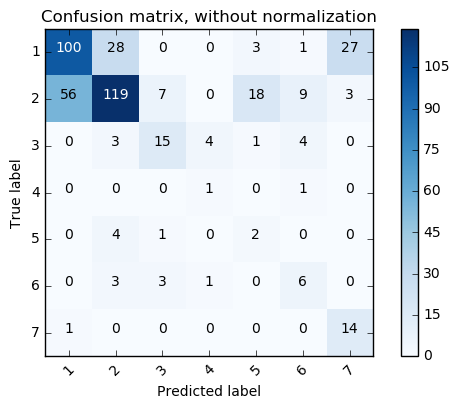

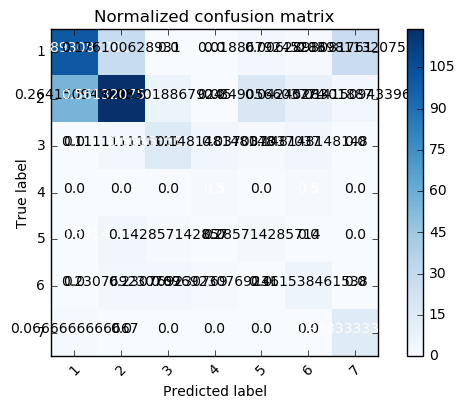

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_75)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [40]:
#choosing 100% of the training set
#using randomundersampling and then selecting 500 samples from the that

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus_75_100, y_rus_75_100, idx_rus_75_100 = rus.fit_sample(X_train75, y_train75)
print('Resampled dataset Shape {}'.format(Counter(y_rus_75_100)))
print(len(y_rus_75_100))


Resampled dataset Shape Counter({1: 2060, 2: 2060, 3: 2060, 4: 2060, 5: 2060, 6: 2060, 7: 2060})
14420


In [41]:
#choose 500 samples from  samples
import random
print(len(X_rus_75_100[0]))
print(len(X_rus_75_100.T[0]))

data_100 = []
for i in range(0,54):
    data_100.append(X_rus_75_100.T[i])

    
#attaching labels    
data_100.append(y_rus_75_100.T)    

data_100  = np.array(data_100).T
print(len(data_100))

print(data_100.shape)


data_sample_100 = random.sample(list(data_100), 500)

data_sample_100 = np.array(data_sample_100)
print(data_sample_100.shape)


data_sample_100 = data_sample_100.T
X_100 = data_sample_100[0:54]
X_100 = X_100. T
print(X_100.shape)

Y_100 = data_sample_100[54]
Y_100 = Y_100.T
print(Y_100.shape)


print('Small dataset Shape from 100% of the 75%training set {}'.format(Counter(Y_100)))

54
14420
14420
(14420, 55)
(500, 55)
(500, 54)
(500,)
Small dataset Shape from 100% of the 75%training set Counter({3: 82, 2: 81, 5: 78, 1: 68, 4: 68, 6: 65, 7: 58})


In [42]:
#using default rbf
clf_rbf_100 = svm.SVC(kernel = 'rbf')
scores_rbf_100_2 = cross_val_score(clf_rbf_100, X_100, Y_100, cv = 2)
scores_rbf_100_2.mean()

0.1619945919134706

In [43]:

scores_rbf_100_5 = cross_val_score(clf_rbf_100, X_100, Y_100, cv = 5)
scores_rbf_100_5.mean()

0.16204480751760258

In [44]:
#using default poly
clf_poly_100 = svm.SVC(kernel = 'poly')
scores_poly_100_2 = cross_val_score(clf_poly_100, X_100, Y_100, cv = 2)
scores_poly_100_2.mean()

0.56198499175986816

In [45]:

scores_poly_100_5 = cross_val_score(clf_poly_100, X_100, Y_100, cv = 5)
scores_poly_100_5.mean()

0.56472901713269763

In [46]:
#using default linear
clf_linear_100 = svm.SVC(kernel = 'linear')
scores_linear_100_2 = cross_val_score(clf_linear_100, X_100, Y_100, cv = 2)
scores_linear_100_2.mean()

0.58807340917454676

In [47]:

scores_linear_100_5 = cross_val_score(clf_linear_100, X_100, Y_100, cv = 5)
scores_linear_100_5.mean()

0.62633368672846135

In [48]:
#using default sigmoid
clf_sigmoid_100 = svm.SVC(kernel = 'sigmoid')
scores_sigmoid_100_2 = cross_val_score(clf_sigmoid_100, X_100, Y_100, cv = 2)
scores_sigmoid_100_2.mean()

0.16400262404198468

In [49]:

scores_sigmoid_100_5 = cross_val_score(clf_sigmoid_100, X_100, Y_100, cv = 5)
scores_sigmoid_100_5.mean()

0.16400559183132807

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

param_grid = {"C": [1,2,3,4,5],
              "kernel":['poly','linear'],
              "degree": [3, 4,5,6],
              "decision_function_shape" : ['ovo', 'ovr'] }

# run grid search
grid_search = GridSearchCV(clf_linear_100, param_grid=param_grid)
start = time()
grid_search.fit(X_100, Y_100)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

In [50]:
#choosing the best kernel to test the data

scores_linear_2_test_100 = cross_val_score(clf_linear_100, X_test25_small, y_test25_small, cv = 2)
scores_linear_2_test_100.mean()

0.62087737843551793

In [51]:
scores_linear_5_test_100 = cross_val_score(clf_linear_100, X_test25_small, y_test25_small, cv = 5)
scores_linear_5_test_100.mean()

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.66438494777756074

In [52]:
#find the accuracy score

from sklearn.metrics import accuracy_score

clf_linear_100.fit(X_100, Y_100)
y_pred_100 = clf_linear_100.predict(X_test25_small)
accuracy_score(y_test25_small, y_pred_100)

0.58620689655172409

Confusion matrix, without normalization
[[ 88  48   0   0   2   1  20]
 [ 48 125   4   0  25   7   3]
 [  0   0  17   2   4   4   0]
 [  0   0   0   1   0   1   0]
 [  0   3   0   0   4   0   0]
 [  0   3   2   1   0   7   0]
 [  2   0   0   0   0   0  13]]
Normalized confusion matrix
[[ 0.55  0.3   0.    0.    0.01  0.01  0.13]
 [ 0.23  0.59  0.02  0.    0.12  0.03  0.01]
 [ 0.    0.    0.63  0.07  0.15  0.15  0.  ]
 [ 0.    0.    0.    0.5   0.    0.5   0.  ]
 [ 0.    0.43  0.    0.    0.57  0.    0.  ]
 [ 0.    0.23  0.15  0.08  0.    0.54  0.  ]
 [ 0.13  0.    0.    0.    0.    0.    0.87]]


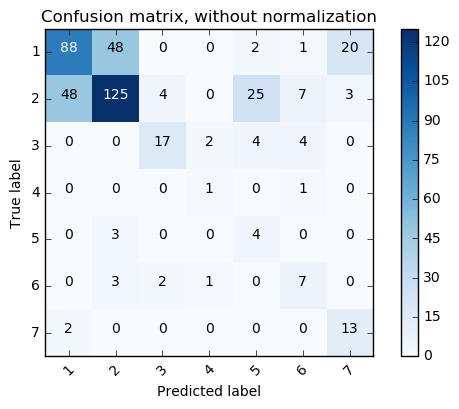

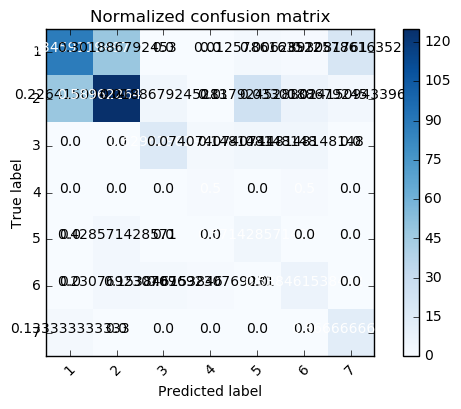

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test25_small, y_pred_100)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = names, normalize=True, title='Normalized confusion matrix')
plt.show()